# Установка библиотек

In [110]:
import pandas as pd #для работы с таблицами

In [ ]:
# Установим модуль `stats` библиотеки `scipy` для автоматического применения статистического 
# критерия
!pip install scipy
!pip install statsmodels

# Данные

In [112]:
import numpy as np
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

#Для создания датафрейма есть много способов, например:
# 1)Создадим датафрейм из списка, а затем подсадим еще один столбец:
df_1 = pd.DataFrame(magadan, columns=['Magadan'])
df_1['Petersburg'] = pd.DataFrame(petersburg)
display(df_1)

# 2) способ № 2: через словарь
print(len(petersburg)==len(magadan))
# Размерности списков для создания датафрейма не равны, выровняем их универсальным способом 
# и создадим датафрейм через словарь:
pad_list = lambda x,n: x + [''] * (n - len(x))
df_2 = pd.DataFrame({'Petersburg': pad_list(petersburg, max_len),'Magadan': pad_list(magadan, max_len)})
df_2 = df_2.replace('', np.nan)
display(df_2)

# 3) способ №3: создадим два датафрейма и склеим их по столбцам:
df_p = pd.DataFrame(petersburg, columns=['Petersburg'])
df_m = pd.DataFrame(magadan, columns=['Magadan'])
df_3 = pd.concat([df_p, df_m], axis = 1)
display(df_3)
#примем за df любой из них
df = df_3
# для дальнейшей работы заполним пустую ячейку медианным значением:
values = {'Petersburg': df['Petersburg'].median()}
df = df.fillna(values)
df

,Magadan,Petersburg
0,0.1033,0.0974
1,0.0915,0.1352
2,0.0781,0.0817
3,0.0685,0.1016
4,0.0677,0.0968
5,0.0697,0.1064
6,0.0764,0.1050
7,0.0689,NaN


False


,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


# Проверка данных на нормальность

In [113]:
# Создадим гипотезы:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [114]:
# Установим уровень значимости, возьмем стандартный:
alpha = 0.05

## Тест Шапиро-Уилка

In [115]:
from scipy.stats import shapiro

In [116]:
_, p = shapiro(df)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.101
Данные распределены нормально


# Тест Д'Агностино

In [117]:
from scipy.stats import normaltest
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.035
Данные распределены нормально


c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Данные распределены нормально согласно тесту Шапиро-Уилка и согласно тесту Д'Агностино. 
Значит для поиска связи и для сравнения переменных мы будем использовать параметрические тесты. 

<AxesSubplot: >

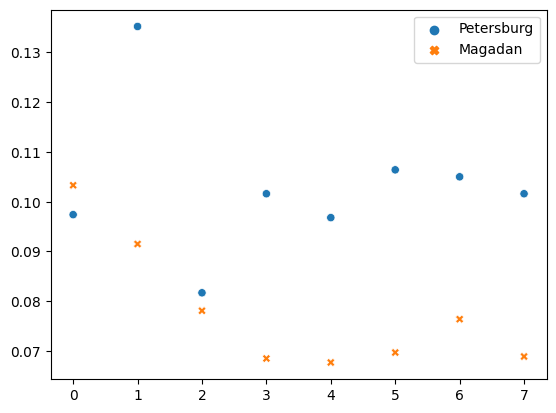

In [140]:
#Для исследования корреляции построим диаграмму рассеивания:
import seaborn as sns
sns.scatterplot(data=df)


Из диаграммы видно, что линейной связи между признаками не прослеживается, значит рассчет корреляции Пирсона нам ничего не даст. Используем ранговую корреляцию Спирмена:

In [145]:
from numpy.random import rand
from scipy.stats import spearmanr

corr, p = spearmanr(df['Magadan'], df['Petersburg'])
print(corr,p)
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.15569141404872364 0.712761707999163
0.712761707999163 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


Вычисление указывает на наличие очень слабой корреляции между размерами мидий в двух рассматриваемых городах.
А поскольку p-значение корреляции больше 0,05, результаты не являются статистически значимыми.

## Посчитаем разницу в среднем размере мидии в зависимости от города-производителя.


In [160]:
display(round(df['Petersburg'].mean()-df['Magadan'].mean(), 3))

0.025

Вывод: размер раковины мидии из Санкт-Петербурга в среднем на 0.025 больше размера раковины мидии из Магадана.
# Проведем сравнительный тест.
У нас есть количественная зависимая перменная (размер раковины мидий) и две группы (Магадан и Санкт-Петербург). Для проверки не более двух независимых групп данных на равенство средних значений выборок
(при условии не более 30 объектов в выборе) нужен независмый T-test.


# Независимый T-тест

In [163]:
from scipy.stats import ttest_ind
H0 = 'Нет значимой разницы между размерами мидий в Магадане и Санкт-Петербурге.'
Ha = 'Есть значимая разница между размерами мидий в Магадане и Санкт-Петербурге.'
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['Magadan'], df['Petersburg'], equal_var=True)

    p = round(test_results[1],4)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.0029 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами мидий в Магадане и Санкт-Петербурге.


Результат независимого Т-теста показал, что значение p-value, равное вероятности отсутствия разницы в размерах мидий, находится на уровне 0,0029, что значительно меньше установленного нами значения альфа 0,05.
Значит полученные результаты статистически значимы и согласуются с альтернативной гипотезой Ha, то есть существует значимая разница между размерами раковин мидий в Магадане и Санкт-Петербурге.